In [0]:
# Import required Libraries
import numpy as np
import pandas as pd

In [125]:
#For uplading files to google colaboratory
from google.colab import files
uploaded =files.upload()
rawdata = pd.read_excel('organic_keywords_dataset.xlsx',encoding = 'unicode_escape')


Saving organic_keywords_dataset.xlsx to organic_keywords_dataset (4).xlsx


In [126]:
#To see some elements of the dataset
rawdata[:7]

,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Trends,Timestamp,Volume Ratio,Result,Rank
0,shower pan,3,3,33100,77.34,1.00,https://bestbath.com/products/showers/pans/,2979,14.03,2979,1.0,165000000,"[67,67,67,82,82,67,82,67,67,100,82,82]",1562800468,NaN,NaN,NaN
1,best bath,1,1,3600,78.95,1.85,https://bestbath.com/,2880,13.56,5328,1.0,1280000000,"[100,82,82,82,82,82,82,82,82,100,100,100]",1562796435,NaN,NaN,NaN
2,shower base,5,5,22200,76.92,0.93,https://bestbath.com/products/showers/pans/,1110,5.22,1032,1.0,469000000,"[82,67,67,67,82,67,82,67,67,100,82,82]",1562805830,NaN,NaN,NaN
3,bathtub surround kits,1,1,1600,81.20,0.98,https://bestbath.com/products/tub-surrounds/,752,3.54,736,1.0,1220000,"[67,54,42,42,100,100,79,67,54,67,67,79]",1560963111,NaN,NaN,NaN
4,tub shower combo,5,5,14800,84.20,0.89,https://bestbath.com/products/tubs/shower-tub-...,740,3.48,658,1.0,56300000,"[67,55,67,82,82,82,82,82,67,100,100,100]",1562805217,NaN,NaN,NaN
5,handicap showers,3,3,5400,63.13,2.00,https://bestbath.com/products/showers/,486,2.28,972,1.0,83900000,"[82,67,67,67,82,67,67,67,67,100,82,82]",1562801752,NaN,NaN,NaN
6,tub surround,7,7,12100,83.42,0.99,https://bestbath.com/products/tub-surrounds/,484,2.28,479,1.0,45900000,"[82,67,67,67,67,67,67,67,67,100,82,100]",1562806450,NaN,NaN,NaN


In [0]:
# Define Features for training and testing of Ml models.
features = ["Traffic",
            "CPC", 
            "Number of Results",
            "Search Volume"]
# Define Target (What should be predicted).
target = "Position"
#we can change both the features and target according to requirement. 

In [128]:
# Split the datset in ratio 0f 4:1(80%:20%) for train and test data
train = rawdata.sample(frac=0.8)
test = rawdata.loc[~rawdata.index.isin(train.index)]
print ("Train rows: {}".format(len(train.index)))
print ("Test rows: {}".format(len(test.index)))

Train rows: 6067
Test rows: 1517


In [0]:
# Import different Ml Alorithms to see differences between their predictions
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
# The Function to print readable scores of the models
def print_scores(scores):
    r = 1
    for score in scores:
        print("Run: {} - Score: {}".format(r, score))
        r += 1

In [0]:
# Define Linear Regression Model 
LinearRegressionModel =LinearRegression()


In [132]:
# Train the Model
LinearRegressionModel.fit(train[features], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
# Test how the model performes against the Training data we split above...
prediction_score = LinearRegressionModel.score(test[features], test[target])
print("The score of prediction for LinearRegressionModel is: {}".format(prediction_score))

The score of prediction for LinearRegressionModel is: 0.007124013640240734


In [0]:
# Define the Descision Classifier Model
DecisionTreeClassifierModel = DecisionTreeClassifier()

In [135]:
#Train the Model
DecisionTreeClassifierModel.fit(train[features], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
prediction_score = DecisionTreeClassifierModel.score(test[features], test[target])
print("The score of prediction for DecisionTreeClassifierModel is: {}".format(prediction_score))

The score of prediction for DecisionTreeClassifierModel is: 0.06328279499011207


In [148]:
# Define RandaomForest Regressor model

pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=200))
 
# Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [5, 3]}
 
# Tune model using cross-validation pipeline
RandomForestRegressorModel = GridSearchCV(pipeline, hyperparameters, cv=5)
 
RandomForestRegressorModel.fit(train[features], train[target])
prediction_score = RandomForestRegressorModel.score(test[features], test[target])
print("The score of prediction for RandomForestRegressorModel is: {}".format(prediction_score))

The score of prediction for RandomForestRegressorModel is: 0.3104056658231027


In [149]:
# Print Predictions for all created Models
# Give Sample values to parameters for predictions
sample = [[1032,0.93,469000000,22200]]  # needs to be same count as features

rawdata_to_predict = pd.DataFrame(data = sample, index=[0], columns=features)
result = LinearRegressionModel.predict(rawdata_to_predict)
print("LinearRegressionModel predicted:       {}".format(int(result[0])))
result = DecisionTreeClassifierModel.predict(rawdata_to_predict)
print("DecisionTreeClassifierModel predicted: {}".format(int(result[0])))
result = RandomForestRegressorModel.predict(rawdata_to_predict)
print("RandomForestRegressorModel predicted:  {}".format(int(result[0])))

LinearRegressionModel predicted:       7
DecisionTreeClassifierModel predicted: 5
RandomForestRegressorModel predicted:  5


In [0]:
#  Define the function to plot Models
import matplotlib.pyplot as plt

def plt_ctr_from_to_position(models, features, from_pos, to_pos, data):
    for model in models:
        predictions_x = []
        predictions_y = []
        positions = range(from_pos, to_pos)
        for pos in positions:
            df_to_predict = pd.DataFrame(data = sample, index=[0], columns=features)
            predictions_x.append(pos)
            predictions_y.append(model.predict(df_to_predict)[0])
        predictions_x, predictions_y
        plt.plot(predictions_x, predictions_y)

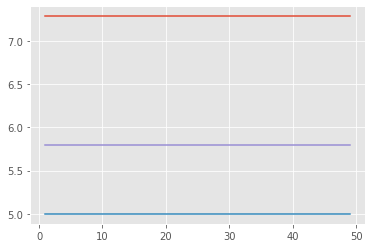

In [151]:
#Plotting the graph
plt_ctr_from_to_position([LinearRegressionModel, DecisionTreeClassifierModel, RandomForestRegressorModel], features,1 ,50 , data)

In [0]:
#Define the function such that you like to filter the data. 
def analyzePositionSpecs(min_p,max_p):
    jk = rawdata.loc[(rawdata['Position'] >= min_p) & (rawdata['Position'] <= max_p)]
    return jk

In [0]:
#Give desired filter positions to function.
jk = analyzePositionSpecs(5,15)

# Creates the total volume for 'Search Volume' column
def Volume(x):
    total = x['Search Volume'].sum()
    return total
netvolume = Volume(jk)

# Converting search volume into a percentage
svp = (jk['Search Volume']/netvolume)*100


In [0]:
# Make booleans for filter parameters, change if statement for choice parameters
newData = []
for value in jk['Search Volume']:
    if (value/netvolume)*100 >= 1:
        newData.append(True)
    else:
        newData.append(False)
  

In [0]:
# add new columns variables to data frame      
jk.loc[:,'Volume Ratio'] = svp
jk.loc[:,'Result']= newData

In [108]:
# create final dataframe
finalresult = jk.loc[jk['Result'] == True]
finalresult


,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Trends,Timestamp,Volume Ratio,Result,Rank
2,shower base,5,5,22200,76.92,0.93,https://bestbath.com/products/showers/pans/,1110,5.22,1032,1.0,469000000,"[82,67,67,67,82,67,82,67,67,100,82,82]",1562805830,9.773708,True,NaN
4,tub shower combo,5,5,14800,84.20,0.89,https://bestbath.com/products/tubs/shower-tub-...,740,3.48,658,1.0,56300000,"[67,55,67,82,82,82,82,82,67,100,100,100]",1562805217,6.515805,True,NaN
6,tub surround,7,7,12100,83.42,0.99,https://bestbath.com/products/tub-surrounds/,484,2.28,479,1.0,45900000,"[82,67,67,67,67,67,67,67,67,100,82,100]",1562806450,5.327111,True,NaN
8,shower tub,6,6,8100,77.51,1.04,https://bestbath.com/products/tubs/shower-tub-...,405,1.90,421,1.0,369000000,"[82,82,55,67,67,67,67,67,67,100,82,82]",1562805487,3.566083,True,NaN
9,bathtub shower combo,5,5,8100,85.40,0.81,https://bestbath.com/products/tubs/shower-tub-...,405,1.90,328,1.0,72500000,"[100,82,82,82,82,82,67,67,67,100,82,100]",1562804244,3.566083,True,NaN
11,bathtub surround,7,7,6600,84.19,1.19,https://bestbath.com/products/tub-surrounds/,264,1.24,314,1.0,41800000,"[81,67,54,67,67,67,67,67,67,100,100,100]",1562799078,2.905697,True,NaN
21,bathtub shower,8,8,4400,84.60,1.10,https://bestbath.com/products/tubs/shower-tub-...,132,0.62,145,1.0,519000000,"[81,67,67,81,81,81,81,81,81,100,100,100]",1562805823,1.937131,True,NaN
22,shower base sizes,5,5,2400,76.43,0.92,https://bestbath.com/products/showers/pans/,120,0.56,110,1.0,194000000,"[81,36,28,36,81,81,36,52,67,100,100,67]",1560962654,1.056617,True,NaN
23,tub and shower combo,7,7,2900,86.03,0.72,https://bestbath.com/products/tubs/shower-tub-...,116,0.54,83,1.0,175000000,"[55,66,55,55,66,66,66,66,55,100,82,82]",1562805178,1.276746,True,NaN
25,garden tub,14,14,14800,83.70,0.69,https://bestbath.com/products/tubs/garden-tubs/,103,0.48,71,1.0,394000000,"[100,82,82,82,82,67,82,67,82,100,100,100]",1562812371,6.515805,True,NaN
